In [16]:
import pandas as pd
dados = pd.read_csv('./dados/aluguel_residencial.csv', sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [17]:
dados.Valor.mean()

5046.172821405663

In [18]:
bairros = ['Barra da Tijuca', 'Copacabana', 'Ipanema', 'Leblon', 'Botafogo', 'Flamengo', 'Tijuca']
selecao = dados.Bairro.isin(bairros)
dados = dados[selecao]
dados.Bairro.drop_duplicates()
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
5,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,0.0,0.0,29.33,Casa
9,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0,50.00,Apartamento
10,Quitinete,Copacabana,1,0,0,27,1800.0,501.0,0.0,66.67,Apartamento
11,Apartamento,Copacabana,4,3,1,243,13000.0,2000.0,803.0,53.50,Apartamento


In [19]:
grupo_bairro = dados.groupby('Bairro')
type(grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [20]:
grupo_bairro.groups

{'Barra da Tijuca': Int64Index([    5,    14,    16,    21,    30,    32,    35,    42,    43,
                60,
             ...
             21769, 21771, 21774, 21782, 21800, 21801, 21811, 21812, 21813,
             21820],
            dtype='int64', length=3863),
 'Botafogo': Int64Index([   23,    48,    87,    88,   111,   119,   127,   134,   196,
               200,
             ...
             21471, 21487, 21499, 21529, 21653, 21660, 21666, 21715, 21746,
             21790],
            dtype='int64', length=873),
 'Copacabana': Int64Index([    0,     9,    10,    11,    24,    25,    28,    31,    86,
                91,
             ...
             21707, 21713, 21736, 21743, 21780, 21783, 21795, 21809, 21810,
             21815],
            dtype='int64', length=2644),
 'Flamengo': Int64Index([   78,   138,   218,   284,   321,   347,   356,   361,   369,
               393,
             ...
             21527, 21560, 21581, 21629, 21680, 21704, 21728, 21731, 21740,
  

In [21]:
for bairro, data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Botafogo -> 8791.828178694159
Copacabana -> 4126.677004538578
Flamengo -> 4113.526610644258
Ipanema -> 9352.001133786847
Leblon -> 8746.344992050874
Tijuca -> 2043.52


In [22]:
grupo_bairro[['Valor', 'Condominio']].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Botafogo,8791.83,976.28
Copacabana,4126.68,1148.68
Flamengo,4113.53,1102.15
Ipanema,9352.00,2244.44
Leblon,8746.34,2107.18
Tijuca,2043.52,711.69


In [23]:
import pandas as pd
alunos = pd.DataFrame({'Nome': ['Ary', 'Cátia', 'Denis', 'Beto', 'Bruna', 'Dara', 'Carlos', 'Alice'], 
                        'Sexo': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F'], 
                        'Idade': [15, 27, 56, 32, 42, 21, 19, 35], 
                        'Notas': [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6], 
                        'Aprovado': [True, False, False, True, True, True, False, False]}, 
                        columns = ['Nome', 'Idade', 'Sexo', 'Notas', 'Aprovado'])
alunos.head()

,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True


# Estatísticas Descrictivas

In [24]:
grupo_bairro.Valor.describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Botafogo,873.0,8791.83,152202.41,700.0,2200.0,3000.0,4350.0,4500000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Flamengo,714.0,4113.53,3839.13,800.0,1900.0,2900.0,4975.0,35000.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Leblon,1258.0,8746.34,7004.04,100.0,4500.0,7000.0,10500.0,100000.0
Tijuca,1100.0,2043.52,1664.34,750.0,1500.0,1800.0,2300.0,45000.0


In [25]:
grupo_bairro.Valor.aggregate(['min', 'max']).rename(columns = {'min': 'Mínimo', 'max': 'Máximo'})

,Mínimo,Máximo
Bairro,,
Barra da Tijuca,800.0,600000.0
Botafogo,700.0,4500000.0
Copacabana,100.0,35000.0
Flamengo,800.0,35000.0
Ipanema,1200.0,90000.0
Leblon,100.0,100000.0
Tijuca,750.0,45000.0


In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0, 0.5, 'Valor do Aluguel')

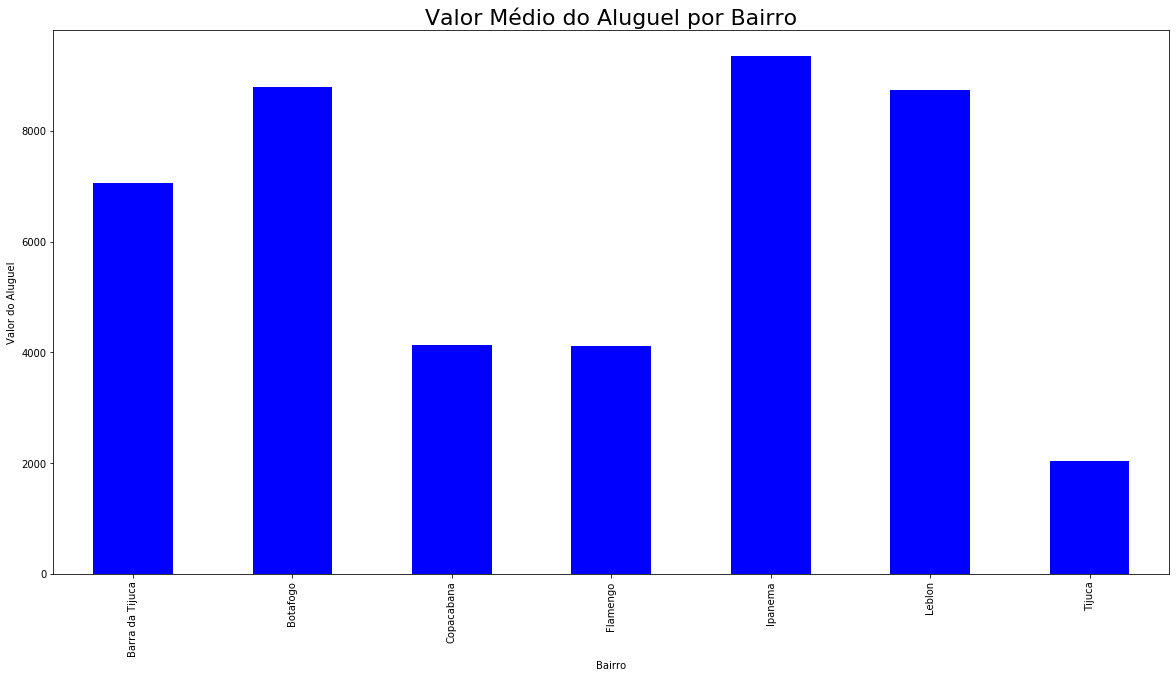

In [27]:
fig = grupo_bairro['Valor'].mean().plot.bar(color = 'blue')
fig.set_title('Valor Médio do Aluguel por Bairro', {'fontsize': 22})
fig.set_ylabel('Valor do Aluguel')

Text(0, 0.5, 'Valor do Aluguel')

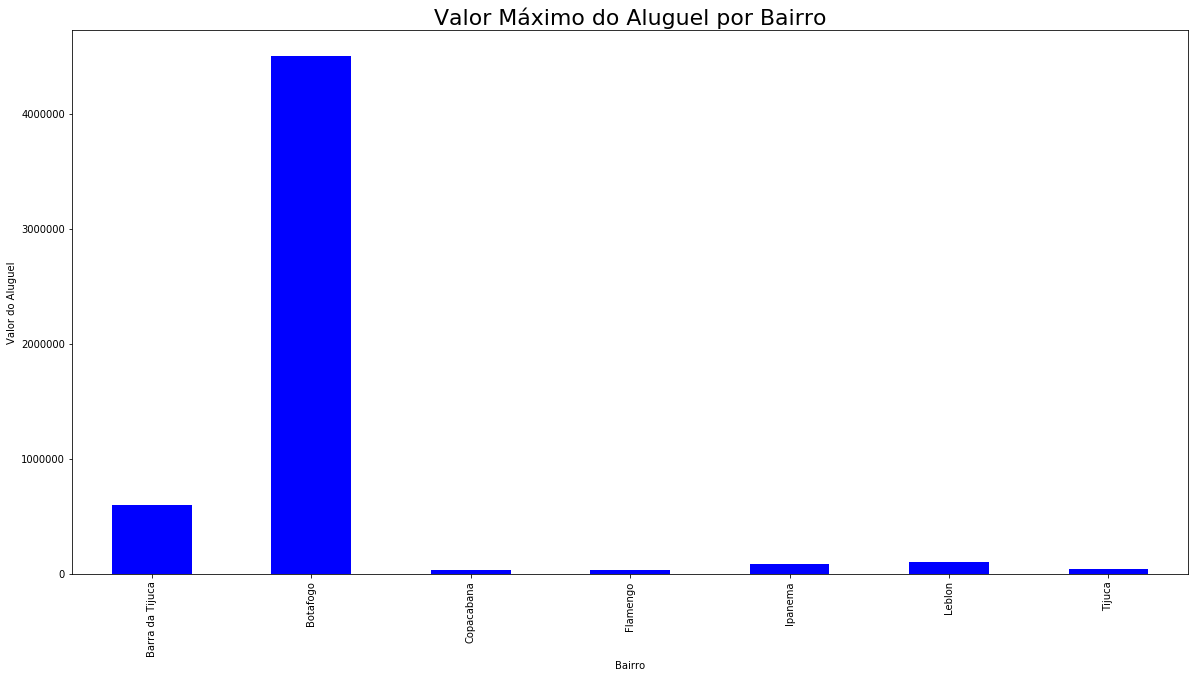

In [28]:
fig = grupo_bairro['Valor'].max().plot.bar(color = 'blue')
fig.set_title('Valor Máximo do Aluguel por Bairro', {'fontsize': 22})
fig.set_ylabel('Valor do Aluguel')

In [29]:
precos = pd.DataFrame([['Feira', 'Cebola', 2.5], 
                        ['Mercado', 'Cebola', 1.99], 
                        ['Supermercado', 'Cebola', 1.69], 
                        ['Feira', 'Tomate', 4], 
                        ['Mercado', 'Tomate', 3.29], 
                        ['Supermercado', 'Tomate', 2.99], 
                        ['Feira', 'Batata', 4.2], 
                        ['Mercado', 'Batata', 3.99], 
                        ['Supermercado', 'Batata', 3.69]], 
                        columns = ['Local', 'Produto', 'Preço'])
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [30]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0